# Atividade 02 (ATIV-02)

**Nome:** Márcio Constâncio Junior

Tipo: Somativa;

Tema: Algoritmos básicos de programação em linguagem python e análise de dados.

Conteúdo: Módulo 1 e 2.

Participantes: Individual.

## Avaliação do aluno.

Objetivo: Avaliar desempenho do aluno sobre conhecimentos básicos de programação em linguagem python e visualização e análise de dados.

Nota: 0 a 3 supercrítico, 4 a 6 crítico, 5 a 7 razoável e 8 a 10 bom;

Critérios avaliados: Respostas com coerência, coesão e com exemplos.

Informações adicionais: A atividade é composta por 5 questões dissertativas sobre python e 5 questões sobre visualização e análise de dados.

In [37]:
#Importação de algumas bibliotecas necessárias para o funcionamento deste arquivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Escreva uma função que receba uma lista de números e retorne outra lista com os números ímpares.

In [38]:
def imprime_impares(lista):
    impares=[]
    for numero in lista:
        if int(numero) % 2 != 0:
            impares.append(int(numero))
    return impares

#Testando a função
imprime_impares([1,2,3,4,5,6,7,8,9,10])

[1, 3, 5, 7, 9]

## 2. Escreva uma função que receba uma lista de números e retorne outra lista com os números primos presentes.

In [39]:
def primos(lista):
    conjunto = set(lista)
    aux = []
    for valor in conjunto:
        divisor = valor//2
        eh_divisivel = 0
        while divisor > 1:
            if int(valor % divisor) == 0:
                eh_divisivel += 1
                divisor -= 1
            divisor -= 1
        if eh_divisivel == 0:
            aux.append(valor)
    return aux

#Testando a função
primos([1,2,3,4,5,6,7,8,9,10,11,12,13,12,14,15,16,17,19,18])


[1, 2, 3, 5, 7, 11, 13, 17, 19]

## 3.​ Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

In [40]:
def diferenca_listas(lista1,lista2):
    conj1 = set(lista1)
    conj2 = set(lista2)

    return list(conj1.difference(conj2))

a = [1,2,3,4,5,6]
b = [2,3,6,7,8,9,10]

diferenca_listas(a,b)


[1, 4, 5]

## 4.​ Dada uma lista de números inteiros, escreva uma função para encontrar o segundo maior valor na lista.

In [41]:
def segundo_maior(lista):
    lista.sort()
    return lista[-2]

teste = [1,3,5,7,9,10,2,4,6,8]

segundo_maior(teste)

9

## 5.​ Crie uma função que receba uma lista de tuplas, cada uma contendo o nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das pessoas em ordem alfabética.

In [42]:
def lista_ordenada_alfabeticamente(lista):
    return sorted(lista,key=lambda lista:lista[0])

lista = [("Ana",32),("Zezé",56), ("Breno",20),("Marcio",30),("Paulo",28),("Maria",21),("Rosana",45)]

lista_ordenada_alfabeticamente(lista)


[('Ana', 32),
 ('Breno', 20),
 ('Marcio', 30),
 ('Maria', 21),
 ('Paulo', 28),
 ('Rosana', 45),
 ('Zezé', 56)]

## 6.​ Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

Resposta: Usando quartis é possível identificar outliers usando a técnica do IQR. Nesta técnica, o IQR é o intervalo interquartil (Q3 - Q1). Essa diferença, multiplicada por 1,5 é somada ao Q3 e subtraída ao Q1, dessa forma, valores abaixo do Q1 - 1,5IQR ou acima de Q3 + 1,5IQR são considerados _outliers_.
Este método é usado pela função boxplot do _seaborn_. A seguir, mostro um exemplo via código.



Q1: 21.75 
Q3: 115.0 
IQR: 93.25
Limite inferior: -118.125 
Limite superior: 254.875


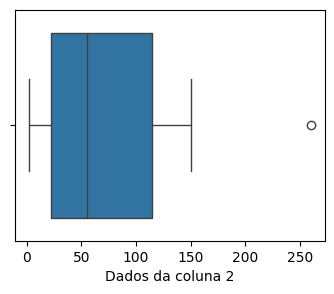

In [43]:
dictio = {'coluna1':[0,1,2,3,4,5,6,7,8,9], "coluna2":[2,8,100,14,120,260,50,45,60,150]}
df = pd.DataFrame(dictio)


q1 = df['coluna2'].quantile(0.25)
q3 = df['coluna2'].quantile(0.75)
iqr = q3 - q1
print(f'Q1: {q1} \nQ3: {q3} \nIQR: {iqr}')

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print(f'Limite inferior: {lower} \nLimite superior: {upper}')

df[(df['coluna2'] < lower) | (df['coluna2'] > upper)]

fig = plt.figure(figsize=(4,3))
sns.boxplot(data=df, x = 'coluna2')
plt.xlabel('Dados da coluna 2')
plt.show()

Ainda neste tópico, é possível selecionar outliers usando desvio padrão através do método z-score. Basicamente, neste método, a distribuição de dados é normalizada em função dos números de desvios padrão abaixo ou acima da média. Dessa forma, podemos considerar que os outliers são aqueles distantes 2 ou três desvios padrão da média, por exemplo. 

## 7.​ Como concatenar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes? Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1 (colunas). Quando há colunas diferentes, os valores ausentes são preenchidos com NaN.

In [44]:
data1 = {
    'ID': [1, 2],
    'Nome': ['Ana', 'Carlos'],
    'Idade': [28, 42]
}
df1 = pd.DataFrame(data1)

data2 = {
    'ID': [3, 4],
    'Nome': ['Beatriz', 'Daniel'],
    'Cidade': ['São Paulo', 'Rio de Janeiro']
}

df2 = pd.DataFrame(data2)

display(pd.concat([df1,df2],axis=0))

display(pd.concat([df1,df2],axis=1))

,ID,Nome,Idade,Cidade
0,1,Ana,28.0,NaN
1,2,Carlos,42.0,NaN
0,3,Beatriz,NaN,São Paulo
1,4,Daniel,NaN,Rio de Janeiro


,ID,Nome,Idade,ID,Nome,Cidade
0,1,Ana,28,3,Beatriz,São Paulo
1,2,Carlos,42,4,Daniel,Rio de Janeiro


Resposta: Do exemplo acima vemos que ao usar pd.concat() com axis = 0, os dataframes são unidos por linha, ou seja, há um empilhamento vertical, com novas linhas sendo adicionadas ao dataframe. As informações que não continham no dataframe 1 (cidade) e no dataframe 2 (idade) apareceram como NaN no novo dataframe. É importante notar que, nessa abordagem, os índices se repetem (0,1,0,1). Para resolver este problema, é possível usar o parâmetro ``ignore_index=True``. Ele reinicia os índices de forma correta (0,1,2,3). 

No segundo resultado, obtido usando pd.concat() e axis = 1 ocorre o empilhamento horizontal, ou seja, novas colunas são adicionadas ao dataframe. No exemplo acima, esta abordagem não foi adequada, pois acrescentou uma nova coluna ID e uma nova coluna Nome. 

## 8.​ Utilizando pandas, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?​

In [45]:
import pandas as pd
df = pd.read_csv("teste.csv")
df.head()

,id,nome,idade
0,1,Marcio,36.0
1,2,Paula,20.0
2,3,Zezé,50.0
3,4,Maria,NaN
4,5,Sérgio,15.0


## 9.​ Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um “DataFrame” com base em uma condição?

In [46]:

df[df['idade'] > 30]


df.query('idade > 30')

,id,nome,idade
0,1,Marcio,36.0
2,3,Zezé,50.0


## 10.​Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?

Resposta: Para lidar com valores ausentes podemos fazer uma investigação do motivo pelo qual aquele valor é faltante. Caso estes sejam poucos no dataset, podemos excluí- (df.dropna()). Caso tenhamos uma ideia do motivo que aquele valor seja ausente, podemos fazer imputação de dados (df.fillna()), tais como o valor da média, moda, mediana ou até mesmo algum valor constante pra sinalizar ao modelo que aquele valor é desconhecido (ex: 0). Nos exemplos abaixo, foi removida a linha que contém um valor nulo (Maria, Nan) e foi colocada a média das idades de Maria.

In [47]:
display(df.dropna(axis=0),df.fillna(df.idade.mean()))

,id,nome,idade
0,1,Marcio,36.0
1,2,Paula,20.0
2,3,Zezé,50.0
4,5,Sérgio,15.0
5,6,Enzo,21.0


,id,nome,idade
0,1,Marcio,36.0
1,2,Paula,20.0
2,3,Zezé,50.0
3,4,Maria,28.4
4,5,Sérgio,15.0
5,6,Enzo,21.0
